In [2]:
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Correlation for Linear Associations

In the last section, we saw several examples of trends between variables. In [Section 10.1](../../10/1/causality.ipynb), we called these trends associations. There are many types of associations. We discussed earlier how some are causal and some are spurious. We will see in this section that some are strong while some are weak. It is also true that some are linear, and some are non-linear. What does this mean?

Think back to your algebra class where you learned about functions. Some functions take the form of a line when plotted and have the equation format: $y = mx + b$. This equation tells us that x and y are associated and that they have a linear relationship. There are also non-linear associations, for example parabolas. Parabolas have the equation format: $y = ax^2 + bx + c$, and tell us that x and y are related quadratically. In this section, we will focus on measuring the strength of *linear* associations.

## Measuring Association

What does it mean to measure the strength of an association? The **strength** of a linear relationship is the extent to which, when the relationship is plotted, the dots cluster around a line. These relationships can be either positive (the line has positive slope) or negative (the line has negative slope). We can measure both the strength and direction of a linear relationship using a **correlation coefficient**. A correlation coefficient is a single number with no units that lies between -1 and 1. A correlation coefficient of 1 indicates a perfect positive association while a correlation coefficient of -1 indicates a perfect negative association. The closer the correlation coefficient lies to 0, the weaker the relationship. A correlation coefficient of 0 indicates the variables are uncorrelated.

| Correlation Coefficient Value |        Interpretation        |
|:-----------------------------:|:----------------------------:|
| 1                             | Perfect Positive Correlation |
| > 0                           | Positively Correlated        |
| 0                             | Uncorrelated                 |
| < 0                           | Negatively Correlated        |
| -1                            | Perfect Negative Correlation |

The following figure gives a visual depiction of strong or weak linear relationships compared to nonlinear relationships.

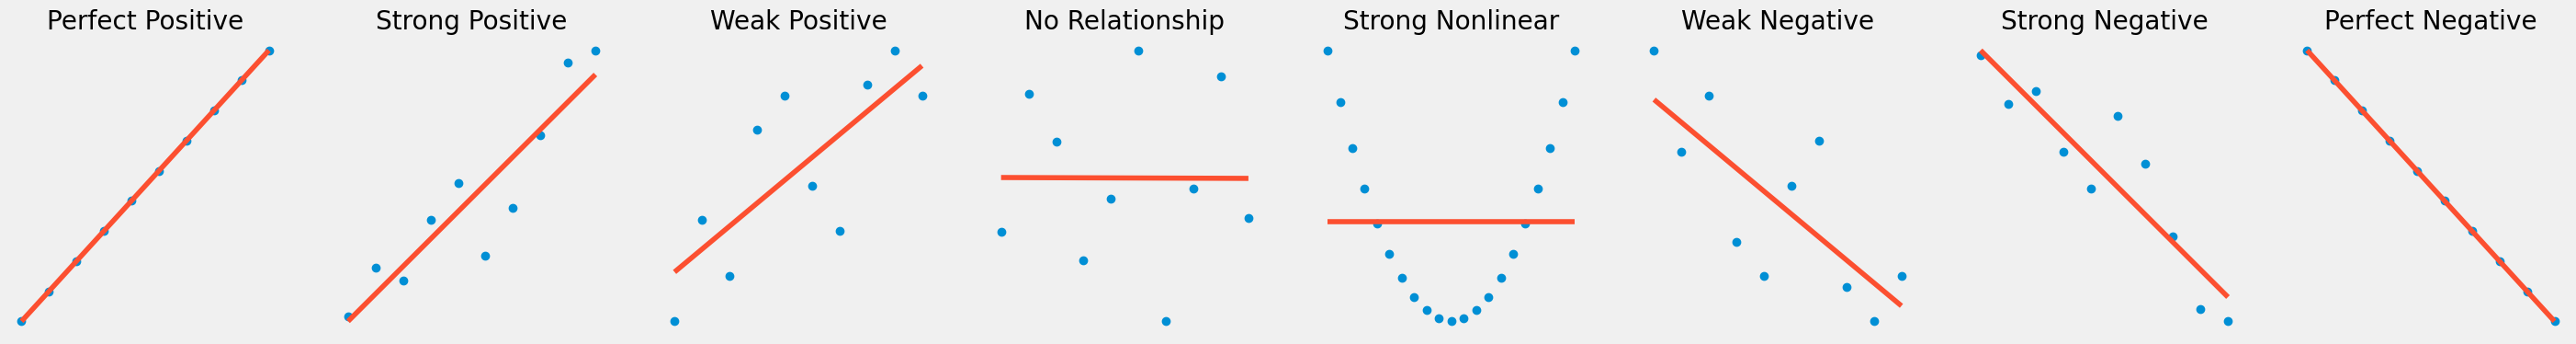

In [14]:
fig, axs = plt.subplots(1, 8, figsize=(32, 4));

x = np.arange(10, 20)
y = 2*x
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[0].plot(x, y, "o");
axs[0].plot(x, p(x), "-");
axs[0].set_title('Perfect Positive');
axs[0].axis('off');

x = np.arange(10, 20)
y = np.array([19,23,22,27,30,24,28,34,40,41])
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[1].plot(x, y, "o");
axs[1].plot(x, p(x), "-");
axs[1].set_title('Strong Positive');
axs[1].axis('off');

x = np.arange(10, 20)
y = np.array([15,24,19,32,35,27,23,36,39,35])
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[2].plot(x, y, "o");
axs[2].plot(x, p(x), "-");
axs[2].set_title('Weak Positive');
axs[2].axis('off');

x = np.arange(0,10)
np.random.seed(123)
y = np.random.normal(size=10)
z = np.polyfit(x, y, 1)  # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[3].plot(x, y, "o");
axs[3].plot(x, p(x), "-");
axs[3].set_title('No Relationship');
axs[3].axis('off');

x = np.arange(-10, 11)
y = x**2
z = np.polyfit(x, y, 1)  # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[4].plot(x, y, "o");
axs[4].plot(x, p(x), "-");
axs[4].set_title('Strong Nonlinear');
axs[4].axis('off');

x = np.arange(10, 20)
y = np.array([15,24,19,32,35,27,23,36,39,35])
z = np.polyfit(x, -1*y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[5].plot(x, -1*y, "o");
axs[5].plot(x, p(x), "-");
axs[5].set_title('Weak Negative');
axs[5].axis('off');

x = np.arange(10, 20)
y = np.array([19,23,22,27,30,24,28,34,40,41])
z = np.polyfit(x, -1*y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[6].plot(x, -1*y, "o");
axs[6].plot(x, p(x), "-");
axs[6].set_title('Strong Negative');
axs[6].axis('off');

x = np.arange(10, 20)
y = 2*x
z = np.polyfit(x, -1*y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
axs[7].plot(x, -1*y, "o");
axs[7].plot(x, p(x), "-");
axs[7].set_title('Perfect Negative');
axs[7].axis('off');

## Calculating the Correlation Coefficient

So, now that we know how to interpret a correlation, how do we calculate a correlation coefficient? A common method is to use Pearson's r which is calculated for two variables x and y as follows: 
> $r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$

We could write a function to calculate this, but as correlation is a commonly used concept in statistics and data science, there are several pre-built functions you can use to calculate r:
- In `numpy` you can use the function `np.corrcoef(x,y)` which produces a correlation matrix (more on this later)
- In `scipy` you can use `scipy.stats.pearsonr(x,y)` which will give you both r and a p-value for the test of significance of the correlation (difference from 0)
- In `pandas` you can use `x.corr(y)` to get the r value

Let's try an example with the pandas `.corr()` method first. Recall the classical height dataset we used in [Chapter 12 Section 3](../../12/3/normal.ipynb). This dataset contains heights of parents and their children. We might expect there to be a relationship between a parent's height and that of their child. Let's plot this and see.

In [84]:
heights_df = pd.read_csv("../../data/height.csv")
heights_df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


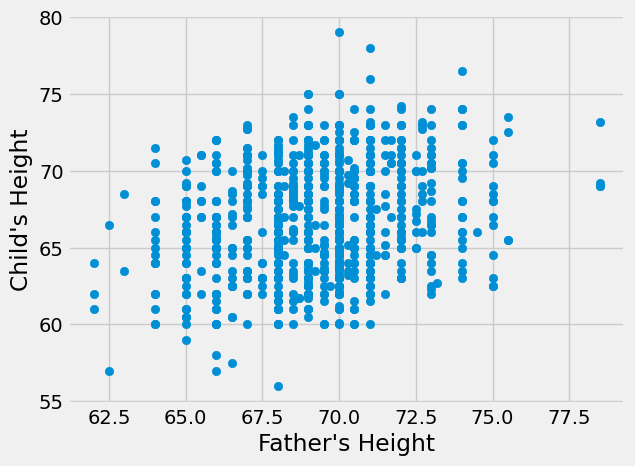

In [85]:
plt.scatter(heights_df['father'],heights_df['childHeight'])
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.show()

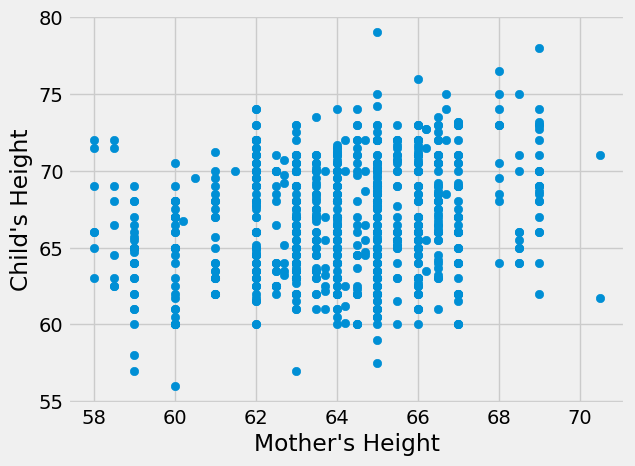

In [86]:
plt.scatter(heights_df['mother'],heights_df['childHeight'])
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
plt.show()

Neither of these relationship seems nonlinear, though the father's height seems to have a stronger relationship by visual inspection. Next, let's calculate the correlation coefficients to measure the true strength and direction of the relationships.

In [87]:
r_father = heights_df['father'].corr(heights_df['childHeight'])
r_mother = heights_df['mother'].corr(heights_df['childHeight'])

print("Correlation coefficient for relationship between father's height and child's height",r_father)
print("Correlation coefficient for relationship between mother's height and child's height",r_mother)

Correlation coefficient for relationship between father's height and child's height 0.2660385389227193
Correlation coefficient for relationship between mother's height and child's height 0.20132194862210065


Both correlation coefficients are positive, indicating that taller parents tend to have taller children (and shorter parents tend to have shorter children). This matches what we know about heredity. We can also see that father's height has a stronger relationship than mother's height with the height of the child, which matches what we visually inspected in the graphs. However, both of these correlation coefficients are fairly small (not close to 1) indicating weak relationships.

### Correlation Matrices and Tests of Significance

A commonly used metric when predicting how tall a child will be is something called midparent height. Midparent height is the average of the mother and father's heights. Let's see if midparent height has a stronger correlation with child height.

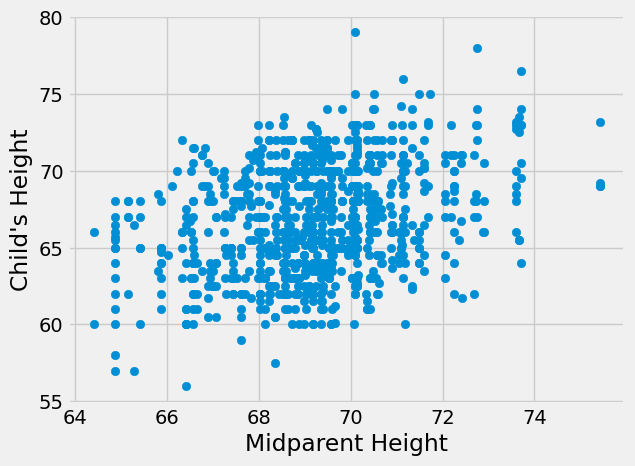

In [88]:
plt.scatter(heights_df['midparentHeight'],heights_df['childHeight'])
plt.xlabel("Midparent Height")
plt.ylabel("Child's Height")
plt.show()

In [89]:
r_midparent = heights_df['midparentHeight'].corr(heights_df['childHeight'])
print("Correlation coefficient for relationship between midparent height and child's height",r_midparent)

Correlation coefficient for relationship between midparent height and child's height 0.32094989606395935


It does! This also matches what we know about heredity. Children get a combination of genes from their mother and father that together decide their physical characteristics, including height. 

Note that if I change which variable is on which axis, this will not change the correlation. Thinking back to the formula for r, multiplication has the same result regardless of order making which variable is x and which is y irrelevant.

Let's try the functions from `numpy` and `scipy`.

In [90]:
# Using numpy

np.corrcoef(heights_df['midparentHeight'],heights_df['childHeight'])

array([[1.       , 0.3209499],
       [0.3209499, 1.       ]])

The numpy code results in a 2-D array or matrix. This matrix is called a correlation matrix and gives correlation coefficients for all combinations of variables inputted to the function. In the following format:

| Corr(Variable 1, Variable 1) | Corr(Variable 1, Variable 2) | ... | Corr(Variable 1, Variable N)|
| --- | --- | --- | --- |
| __Corr(Variable 2, Variable 1)__ | __Corr(Variable 2, Variable 2)__ | __...__ | __Corr(Variable 2, Variable N)__|
| __...__ | __...__ | __...__ | __...__ |
| __Corr(Variable N, Variable 1)__ | __Corr(Variable N, Variable 2)__ | __...__ | __Corr(Variable N, Variable N)__|

In this case, the r value for `midparentHeight` with itself is 1 as it is perfectly correlated with itself - the same for `childHeight` and itself. The r value of x = `midparentHeight` and y = `childHeight` is 0.32 and this is the same value for y = `midparentHeight` and x = `childHeight`. Correlation matrices are more useful when there are more than 2 variables. Let's try it with mother and father heights as well.

In [91]:
np.corrcoef([heights_df['father'],heights_df['mother'],heights_df['midparentHeight'],heights_df['childHeight']])

array([[1.        , 0.06036612, 0.72843929, 0.26603854],
       [0.06036612, 1.        , 0.72783397, 0.20132195],
       [0.72843929, 0.72783397, 1.        , 0.3209499 ],
       [0.26603854, 0.20132195, 0.3209499 , 1.        ]])

The 1's on the diagonal of this matrix represent the correlations between each variable and itself. The off-diagonal values are the correlation coefficients between values. For example, the first row is all correlation coefficients with `father`. The last value in this row is the r value for `father` and `childHeight` and matches the value we calculated earlier. You can see that the matrix is symmetric because changing which variable is x and which is y does not change the value of r. 

Now, let's try the function from `scipy`.

In [92]:
scipy.stats.pearsonr(heights_df['childHeight'],heights_df['midparentHeight'])

PearsonRResult(statistic=0.32094989606395935, pvalue=8.053864992484446e-24)

Again, we get the same value of 0.32, but we also get a p-value. This p-value is for a hypothesis test testing whether the correlation coefficient is significantly different from 0 (ie is there a significant relationship between the two variables). In this case, the p-value is very close to 0 so we can reject the null hypothesis that there is no significant relationship between the two variables.

## Keep in Mind

Recall in [Chapter 10 Section 1](../../10/1/causality.ipynb) we said that association is not the same as causation. The same is true for correlation. Correlation measures associations between variables. Two variables may be associated but not have a causal relationship. In fact, there are many spurious (random) correlations (for more on this [click here](https://www.tylervigen.com/spurious-correlations)).

It is also important to remember that correlation only works for *linear relationships*. A correlation coefficient cannot measure the strength of a nonlinear relationship between variables. For this reason, it is very important to make sure you understand your data before making calculations. It is useful to always graph your variables before calculating a correlation coefficient to make sure the relationship isn't nonlinear. 

Lastly, correlation coefficients are susceptible to outliers in your data. In most cases, an outlier decreases the r value. The more extreme the outlier, the larger the decrease. 

Here is an example:

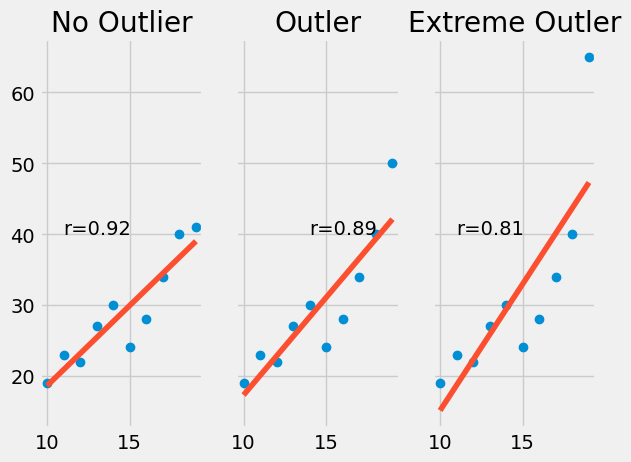

In [93]:
fig, axs = plt.subplots(1, 3, sharey='row');

x = np.arange(10, 20)
y = np.array([19,23,22,27,30,24,28,34,40,41])
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
r = np.corrcoef(x,y)[0,1]
axs[0].plot(x, y, "o");
axs[0].plot(x, p(x), "-");
axs[0].text(x=11,y=40,s="r={}".format(round(r,2)));
axs[0].set_title('No Outlier');

x = np.arange(10, 20)
y = np.array([19,23,22,27,30,24,28,34,40,50])
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
r = np.corrcoef(x,y)[0,1]
axs[1].plot(x, y, "o");
axs[1].plot(x, p(x), "-");
axs[1].text(x=14,y=40,s="r={}".format(round(r,2)));
axs[1].set_title('Outlier');

x = np.arange(10, 20)
y = np.array([19,23,22,27,30,24,28,34,40,65])
z = np.polyfit(x, y, 1) # Ignore this for now, you will learn more about it later
p = np.poly1d(z)
r = np.corrcoef(x,y)[0,1]
axs[2].plot(x, y, "o");
axs[2].plot(x, p(x), "-");
axs[2].text(x=11,y=40,s="r={}".format(round(r,2)));
axs[2].set_title('Extreme Outlier');

It is best practice to remove or otherwise account for outliers in your data to avoid these potential issues. 

In the next few chapters we will continue our discussion of linear relationships and learn to use patterns like those seen in this chapter to construct predictors.